<h2 style = "text-align: center;">Advanced Data Science for Traffic and Transportation Engineering</h2>

<h3 style = "text-align: center;">Determine the Position of Road Inspectors - Rijkswaterstaat</h3><br><br>

<div style="display:flex">
     <div style="flex:1;padding-right:10px;">
          <img src="./Images/rws.jpg" width="260"/>
     </div>
     <div style="flex:1;padding-left:10px;">
          <img src="./Images/tud.png" width="200"/>
     </div>
</div>
<h3 style = "text-align: left;">Group 3</h3>

<ul>
     <li>Yiman Bao (5691648)</li>
     <li>Juan Camargo Fonseca (5834112))</li>
     <li>Tijmen Hoedjes (4959183)</li>
     <li>Max Lange (5169402)</li>
     <li>Wail Abdellaoui (5130654)</li>
</ul>

### **Content** ###

**This notebook is structured as follows:**

<b>1. Introduction</b>
<b><p style="margin-left: 40px">1.1 Research Objective and Research Questions</p></b>
<b><p style="margin-left: 40px">1.2 Tech Stack</p></b>
<b><p style="margin-left: 40px">1.3 Ethical Considerations</p></b>
<b><p style="margin-left: 40px">1.4 Project Management</p></b>


<b>2. Data Story</b>
<b><p style="margin-left: 40px">2.1 Data Overview</p></b>
<b><p style="margin-left: 40px">2.2 Data Filtering and Preprocessing</p></b>
<b><p style="margin-left: 40px">2.3 Streamlit App</p></b>
<b><p style="margin-left: 40px">2.4 Data Analysis Results</p></b>

<b>3. Algorithm</b>
<b><p style="margin-left: 40px">3.1 Data Filtering</p></b>
<b><p style="margin-left: 40px">3.2 Nodal Accident Probability Assingment</p></b>
<b><p style="margin-left: 40px">3.3 Network Creation</p></b>
<b><p style="margin-left: 40px">3.4 Assign all nodes to exits</p></b>
<b><p style="margin-left: 40px">3.5 The Algorithm</p></b>


<b>4. Results</b>

<b>5. Validation</b>
<b><p style="margin-left: 40px">5.1 Covering Area</p></b>
<b><p style="margin-left: 40px">5.2 Average distance to Incidents</p></b>
<b><p style="margin-left: 60px">5.2.1 Sampled Test Set</p></b>
<b><p style="margin-left: 60px">5.2.1 Real Test Set</p></b>

<b>6. Conclusions</b>

### 1. Introduction ###

Have you ever been involved in a road incident in the Netherlands? Did you ever were late to an appointment or event because an incident occurred? If you answered yes, it is most likely that you needed a road inspector to make your life easier. As you may have noticed by now, road inspectors are important to ensure safety on highways and a smooth traffic flow. When an incident occur, they appear and make sure that traffic can quickly resume. Therefore, you can imagine it is important for them to show up as soon as possible when incidents happen. In consequence, an optimal distribution of the inspectors is necessary to make sure that they will arrive shortly after an incident occurs. In this document, we discuss the considerations made for reaching this objective, and the implications for road users in the Netherlands.

#### 1.1 Research Objective and Research Questions ####

The research objective is to find out the optimal location of inspectors in the Dutch road network, such that travel time to the incidents is minimized. For reaching this objective the following research question(s) are proposed. <br><br><b>Main Research Question:</b> What would be the optimal location of road inspectors in the Netherlands, such that travel times to incidents are minimized?

<b>Sub questions:</b>
<ol>
    <li> To what extent the data provided by Rijkswaterstaat is useful for the research objective? </li>
    <li> How do the incidents distribute in time and space in the Dutch network? </li>
    <li> What type of method is suitable for evaluating the accident probabilities? </li>
    <li> What are the locations in which accidents are more likely to happen? </li>
    <li> What variables would affect the response time of inspectors? </li>
    <li> How to calculate the response time of the inspectors?  </li>
    <li> What is the optimal number of road inspectors needed?  </li>
    <li> What is the optimal location for the road inspectors?  </li>
</ol>
    
#### 1.2 Tech Stack ####

Given the requirement of this project, the following is the tech stack that will be used for reaching the research objective.

<b> Coding: </b>The main programming language used will be Python, and necessary packages for data analytics such as Pandas, NumPy, GeoPandas, SciPy, NetworkX, and scikit-learn will be imported as necessary.

<b> Visualization: </b>For standard data visualization, Python libraries such as Matplotlib, Plotly and Seaborn will be employed. For Geospatial visualization, additional tools such as Folium and Rasterio are considered.

<b> Version Control: </b>Git and GitHub will be used for code tracking and collaboration.

<b> Communication: </b>Weekly in-person meetings are planned. However, Microsoft Teams can be used as necessary.

<b> Documentation: </b>Jupyter Notebooks will be used for documenting code, analysis, results and conclusions.

The following code block imports the necessary packages and libraries.

In [1]:
# External packages imports
import numpy as np
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import Point
from matplotlib.lines import Line2D
from collections import defaultdict
import scipy
from scipy.stats import gaussian_kde

# Imports from our own scripts
import validation
import data_filtering
import node_probability
from inspectornr_vs_traveltime import inspector_nr_vs_travel_time, travel_time_vs_nr_plotter
from projection_conversions import DutchRDtoWGS84, WGS84toDutchRD

#### 1.3 Ethical Considerations ####

For this project, a Value Sensitive Design approach is to be followed, for which the stakeholders of the project need to be identified, along with their values and possible value conflicts that may arise. The first stakeholder is Rijkswaterstaat, owner of the project and provider of the data, as previously state, its main goal is to optimize the response time of the road inspectors when an incident occurs on the road network, however they have limited inspector capacity. Another stakeholder are the road users, for which the motorway network represents a way of meeting they daily needs, and who expect the network to be safe and to enable them to travel from A to B in the least possible time. Finally, another important stakeholder to be considered is police and law enforcement, as sometimes incidents can involve fatalities or injuries, in those cases it is necessary to carry out specific procedures in which they need to be involved.<br><br>
Different values can be recognized from these perspectives: in the case of Rijkswaterstaat, efficiency and sustainability are the main driving factors, whereas from users’ perspective safety and reliability are important, and from law enforcement’s side privacy and due diligence are relevant as well. Unfortunately, these objectives cannot be met simultaneously in the project; for example, if many inspectors are assigned to the network, response time can be optimized but the sustainability of the project will be compromised, as well as user safety and ability to travel in the least time possible; the other way around also generates conflicts, as having few inspectors will harm efficiency and also cooperation with authorities in case it is needed.<br><br>
On the other hand, the following issues regarding privacy, fairness and bias were identified:
<ol>
    <li>Data collection period is autumn/winter. (<b>bias</b>).<br><br> First, the incident data collection period is from August to December, which may cause some bias in the incident analysis results as only late summer, fall and early winter seasons are represented. For example, weather conditions can vary significantly between seasons, with fall potentially being more prone to rainy days and falling leaves, while early winter can be accompanied by cold weather and ice and snow, leading to differences in the type and frequency of incidents in different seasons. Finally, traffic flow on the roads may differ by season, due to holidays or special events that can take place, a feat that may affect the occurrence of incidents, making the analysis prone to flow-related biases if this is not accounted for.</li><br>
    <li>Accidents can have some privacy issues (police, insurance claims, etc.) (<b>privacy</b>).<br><br> Privacy issues in accident data analysis may have some important impacts on the results. Due to privacy concerns, some sensitive information may have been removed or anonymized, resulting in limited availability of the data. This may result in missing or incomplete data sets, compromising the comprehensiveness of the accident analysis. Missing critical information may bias the results of the analysis, as all relevant factors cannot be considered. At the same time, data sampling may be limited due to privacy issues. Certain types of accidents or accidents for specific groups of people may not be adequately reflected in the data. This can lead to sampling bias, making the results less representative of the overall situation. Most importantly, however, relevant legal and ethical regulations must be followed when handling incident data to ensure that individual privacy rights are respected. These legal provisions may restrict the use, storage and sharing of data. Violating these regulations may lead to legal issues and may also affect the availability and quality of the data.</li><br>
    <li>Algorithm prioritizing criteria (<b>Bias</b>) <br><br> After data processing and filtering, a large majority of the reported incidents occurred in motorways (A roads), while less than 7% of the data was reported in national highways (N roads). We consider that this can bring bias to the project in two manners, depending on the approach. The first one of them is representation bias, meaning that the main focus of the model will be on motorways and thus the solution devised may not capture the necessary features to devise an optimal inspector assignment for national highway. The second way in which this can bring a bias to the model is that the impact of a disruption may vary depending on the road type in which it occurs. Solely optimizing the response time of the road inspectors will result in a ‘first come, first served’ approach. This will mean that, if an incident in a motorway and another incident in a national highway occur close in time, the inspector assignment may not be optimal at a network level. </li><br>
    <li>Representation bias: unequal representation of accident types (<b>bias</b>)<br><br>Following a similar line of reasoning, around of 80% of the incidents reported correspond to vehicle obstructions, 13% correspond to accidents, and the remaining 7% are catalogued as general obstructions. In consequence, general trends will be like the vehicle obstruction category, and the model obtained can have a better performance for these than for accidents and general obstructions, which may undermine its capability to optimize the road position.</li><br>
    <li> Data leakage (privacy) 
    Data from incidents involving citizens is used. The data itself does not reveal anything about individuals. However, combining this data with other information can lead to serious privacy violations. Therefore, sharing the data with other parties should be prohibited, also transparency about the use of data is important.
    
</ol>

#### 1.4 Project Management ####

For reaching the end goal of the project, a SCRUM project management framework was used. More detailed information can be found in the link below.

<a href="https://tud365-my.sharepoint.com/:f:/g/personal/jcamargofonsec_tudelft_nl/Eqbxs-pfs0ZBh7_sFyhtFqsBP2QVSMZRoqllJnYncS0trA?e=UxQ82N">Access Backlog Diary</a>

### 2. Data Story ###

#### 2.1 Data Overview ####

For the development of the project, two datasets were provided. The first one of them is the Rijkswegen road network shapefile, which contains geometric and functional information of the main roads that compose the dutch motorway network. The second dataset is a csv file of 88,851 incidents that ocurred in the Netherlands, between July 31st, 2019 and December 31st, 2019, for every incident information regarding location, classification, starting time, end time and road number is included.

#### 2.2 Data Filtering and Preprocessing ####

After an initial data exploration, it was clear that some preprocessing and filtering was neccesary. For doing so, the following criteria was considered:

<ol>
    <li>Incidents that occurred in roads not included in the NWD Road Network Data.</li>
    <li>Incidents that had a duration of zero (0) minutes or lasted longer than one day.</li>
    <li>Incidents that did not occur in the Netherlands.</li>
       
</ol>

After applying these procedures, a total of 13,977 incidents were removed. 

In [2]:
#Extract subnetwork
highway_shapefile = 'Data/Shapefiles/Snelheid_Wegvakken.shp'
road_network = gpd.read_file(highway_shapefile)
road_network = road_network.to_crs("EPSG:4326")

path = 'Data/incidents19Q3Q4.csv'
df_incident = pd.read_csv(path)
df_incident['starttime_new'] = pd.to_datetime(df_incident['starttime_new'])
df_incident['endtime_new'] = pd.to_datetime(df_incident['endtime_new'])
tot_inc = len(df_incident)
df_incident = data_filtering.filter_out(df_incident, road_network)
red_inc = len(df_incident)

#print amount of incidents filtered out
print('Total incidents filtered out: ', tot_inc-red_inc)
print('Percentage of incidents filtered out: ', np.round((tot_inc-red_inc)/tot_inc*100,2), '%')


Total incidents filtered out:  13977
Percentage of incidents filtered out:  15.73 %


#### 2.3 Streamlit App ####

For better data visualization, and with the intent of creating a datastory for our project, a Streamlit dashboard was created. The dashboard contains seven pages:

<ol>
    <li>Homepage: Contains and introduction and brief description of the project.<br><br></li>
    <li>Research: In this page the research objective and research questions are described.<br><br></li>
    <li>Visualise data: Enables data visualization according to different filtering parameters.<br><br></li>
    <li>Maps: Shows a heatmap containing the incident clustering, heatmap and KDE map for the project.<br><br></li>
    <li>Spatio-temporal: Enables visualization of incidents that occurred within a specific timeframe. <br><br></li>
    <li>Algorithm: In which the algorithm explanation is done and results of inspector placement are visualized.<br><br></li>
    <li>Evaluation: Contains considerations made regarding validation and testing of results.<br><br></li>
</ol>
To open the streamlit dashboard please uncomment and run the cell below. Note that after you close the dashboard you should manually interrupt the cell execution as well.



In [ ]:
!streamlit run Homepage.py

^C


#### 2.4 Data Analysis Results ####

Based on our visualization results on Streamlit, we came to the following conclusions based on incident's temporal and geographical distribution, incident type and duration of incidents:

<ul>
    <li> The peak hours can be clearly seen in the hourly distribution, there are two of them: one in the morning (7 till 8) and one in the late afternoon(16:00 - 18:00). During these peak hours a larger deployment of inspectors is needed. For the accdient and vehicle_obstruction, they both have ditinct peak hour periods, especially for the accident. But for the general_obstruction, it doesn't show this phenomenon. Since 6 am, the number of general_obstruction start to rise and reach the peak at 3 pm. For the distributions over week and year, the number of incidents don't change much and the differenct types of incident are looks similar. <br><br></li>
    <li> In the distribution of duration of accidents, most accidents last about 80 minutes. The duration of the two types of incidents, vehicle_obstruction and general_obstruction, is relatively short and usually ends within 15 minutes. <br><br></li>
    <li> The incident type may not influence immediate may the optimum ethod to identify the locations of road inspectors to reach thehotspots < 18mins.This insightcan be valuable when we later want to come up with the deployment strategy of road inspectors based on incident types. <br><br></li>
    <li> Taking 15 minutes as the time window, in the data set, up to 30 incidents will occur at the same time within 15 minutes. This has a high reference value for us to subsequently determine the maximum number of inspectors. Maybe 90 inspectors can meet the demand. <br><br></li>
    <li> A10 has relatively the highest accidents and the A16 and A20 are second and third on this list. The A10 goes only through Amsterdam since it is a circle road. The A16 and A20 goes both through Rotterdam, the A20 is longer than the A16. The fourth highway with the highest accidents per km is the A4 which goes from Rotterdam through The Hague to Amsterdam. So, this data show that the highways which pass big cities like Amsterdam, Rotterdam and The Hague (in The Netherlands the collection of these cities and the fourth big city of the Netherlands, Utrecht, is called the 'Randstad') are the most dangeroushighways. <br><br></li>
    <li> Heatmaps results clearly show three high-incidence areas, the largest of which is the Hague-Rotterdam area, followed by the Amsterdam area and finally the Utrecht area. All three areas show a distinct red color. Then there are three yellow zones, Breda, Eindhoven and Arnhem. When the inspectors are subsequently arranged, the inspectors in these areas should be denser.<br><br></li>

### 3. Algorithm ###

Using feedback from the project supervisors, along with assumptions that seemed logical/good to make, the following list of desired functions and used assumptions are created:

<ul>
    <li> The desired number of inspectors to place should be the input parameter of the algorithm.</li>
    <li> Inspectors will only be placed at motorway exits. This is an strategic assumption, as at an exit an inspector has the ability to respond to accidents on both sides of a highway.</li>
    <li> The "accident proneness" or "-risk" of an area should influence the inspector placement. Therefore a way of determining the temporal and spatial accident densities is needed.</li>
    <li> The calculated response time only takes into account the inspector travel time to the incident location at a speed of 100 km/h. Other elements like time to report the incident, and logistic setups are not consdiererd in the calculation.</li>
    <li> Every incident or coverage area only requires one inspector, regardless of type and duration.</li>
</ul>

With this, the compelete workflow to solve the problem should be:
<ol>
    <li> Filter the accident data to a desired subset.</li>
    <li> Assign a probability of accident occurence to each point/node in the network shapefile based on the accident subset.</li>
    <li> Construct the network based on the given shapefile and assigned nodal probability.</li>
    <li> Find the closest highway exit for each node in the network, and assign it to that exit.</li>
    <li> Run the inspector placement algorithm.</li>
</ol>

The next subchapters each go through one of these workflow steps.

#### 3.1 Data Filtering ####

One of the key elements that we wanted to achieve is that the inspector placement responds to specific client needs. In this sense, data can be filtered by date, day of the week, time of the day, and accident type, and this will be the starting point of the algorithm. With the pandas dataframe output of the intial data filtering this easily be done, but for the explanation of the algorithm we will be using the entire (filtered) accident dataset.



In [4]:
df_incident = df_incident

#### 3.2 Nodal Accident Probability Assignment

The next step of the placement is to generate a spatial incident probability function from the filtered data, for which Kernel Density Estimation (KDE) was used. KDE is a non-parametric statistical method used to estimate the probability density function (PDF) of a data set, which will help us move from discrete incident data points into incident probability densities on a map of The Netherlands. The main hyperparameter of this method is the bandwith, as a very large value will make the probability density distribution more blurry while a lower value will make it more difficult to obtain the probability by subsequent integration; for inspector placement, we used a value of 0.03, which was assessed visually by rendering the probability density contours and validating the zones in which incidents are more prone to happen. Finally, the probability value for each section was estimated by multiplying the density value in the midpoint of each road section by the length of said section; even though the actual probability will correspond to an integration of the PDF over the segment, this approach was devised to save computation time.

The network that will be used creates points for the beginning and ends of all segments. For the algorithm to work, the probability for a segment needs to be assigned to these points. This is done via the following rules: if one of the nodes incident to an edge is a leaf node (degree of 1) the assigned probability is zero, and  the edge probability will be fully assigned to the non-leaf node, and if none of the nodes are leaf nodes the assigned probability of a node will be one half of the sum of the probabilities of all the edges incident to that node. Finally, the node probabilities are normalized so that they equal to one when summed. This gives a geodataframe containing all points in the network, with there own "accident probability"

In [3]:
# Create points_gdf with assigned probabilites
# This can take around 5 minutes
points_gdf = node_probability.create_points_gdf(road_network, df_incident)

c:\Users\86180\Desktop\study\ciem6302\project\teamwork\node_probability.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bandwidth = np.mean(road_network['geometry'].length)
c:\Users\86180\Desktop\study\ciem6302\project\teamwork\node_probability.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  road_network['Unnormalized_Probability'] = road_network['Accident_Density'] * road_network['geometry'].length


#### 3.3 Network Creation

A network graph is built using NetworkX, as this packages gives us access to mathematical tools regarding graphs which will allow us to quickly calculate attributes of the network. We already have the points for the network from the probability density calculation, so we first create another geodataframe conatining the edges:

In [4]:
# Create edges_gdf
road_network = gpd.read_file(highway_shapefile)
edges = {'from': [], 'to': [], 'type': [], 'direction': [], 'name': [], 'geometry': []}

for _, row in road_network.iterrows():
    edges['from'].append(row['JTE_ID_BEG'])
    edges['to'].append(row['JTE_ID_END'])
    edges['type'].append(row['BST_CODE'])
    edges['direction'].append(row['RIJRICHTNG'])
    edges['name'].append(row['STT_NAAM'])
    edges['geometry'].append(row['geometry'])

edges_gdf = gpd.GeoDataFrame(edges)
print(f"Initial amount of edges: {len(edges_gdf)}")

Initial amount of edges: 13983


Then we construct the graph by entering the points and edges into a NetworkX MultiDiGraph (MultiDi meaning that edges have limited directions of travel and loops are allowed). We also create "exit nodes" for each exit that is detected in the edges, and connect all edges which are share the same name as this exit to the exit node:

In [5]:
NWB_Graph = nx.MultiDiGraph()

# Add all points to the Graph
for _, point in points_gdf.iterrows():
    NWB_Graph.add_node(point['name'], pos=point['geometry'].coords[0], probability=point['probability'])

# Add edges
already_connected = []
exit_id_count = 0
for index, edge in edges_gdf.iterrows():
    if edge['direction'] in ['H', 'B', 'O']:
        NWB_Graph.add_edge(edge['from'], edge['to'], geom=edge['geometry'], weight=edge['geometry'].length)
    
    if edge['direction'] in ['T', 'B', 'O']:
        NWB_Graph.add_edge(edge['to'], edge['from'], geom=edge['geometry'], weight=edge['geometry'].length)
    
    # Add a new exit node if edge is an exit ramp
    if edge['type'] in ['AFR', 'OPR'] and index not in already_connected:
        to_connect = edges_gdf[edges_gdf['name'] == edge['name']]
        to_connect = to_connect[to_connect['type'].isin(['AFR', 'OPR', 'PST'])]

        # Add an exit node in the middle of all exit sections with the same name
        x = []
        y = []
        exit_id_count += 1
        for _, i in to_connect.iterrows():
            x.append(i['geometry'].coords[-1][0])
            y.append(i['geometry'].coords[-1][1])
        x = np.sum(x) / len(to_connect)
        y = np.sum(y) / len(to_connect)
        NWB_Graph.add_node(exit_id_count, pos=(x, y), probability=0)

        # Connect all to nodes to new exit node
        for index, i in to_connect.iterrows():
            already_connected.append(index)
            NWB_Graph.add_edge(i['to'], exit_id_count, geom=None, weight=0)
            NWB_Graph.add_edge(exit_id_count, i['to'], geom=None, weight=0)
            NWB_Graph.add_edge(i['from'], exit_id_count, geom=None, weight=0)
            NWB_Graph.add_edge(exit_id_count, i['from'], geom=None, weight=0)


print(f"Amount of added exit points: {exit_id_count}")
print(f"Total Nodal size of graph (including added exits): {len(NWB_Graph.nodes)}")
print(f"Total Edge size of graph (including added exits): {NWB_Graph.size()}")

Amount of added exit points: 685
Total Nodal size of graph (including added exits): 14067
Total Edge size of graph (including added exits): 36949


We now have a graph upon which we can run an algorithm

#### 3.4 Assign all nodes to exits
As we only consider exit nodes in our list of possible placements, we need to know what exit node is closest to each node to see which exit covers which sections of the network. More importantly we want to know the total probability all nodes covered by a single exit, as that metric is used in our placement alrogithm. To find which exit is closest to which node we use dijkstra's shortest path algorithm:

In [6]:
# Allocate all nodes to a single exit
nx.set_node_attributes(NWB_Graph, None, "closest_exit")
nx.set_node_attributes(NWB_Graph, np.inf, "closest_exit_dist")

for exit_node in range(1, exit_id_count+1):
    distances = nx.single_source_dijkstra_path_length(NWB_Graph, exit_node)
    for node, dist in distances.items():
        if dist < NWB_Graph.nodes[node]['closest_exit_dist']:
            NWB_Graph.nodes[node]['closest_exit'] = exit_node
            NWB_Graph.nodes[node]['closest_exit_dist'] = dist

Then we calculate the total probability for each exit node by summing up the probabilities of the nodes they cover:

In [7]:
# Calculate total probability for exits
for node in NWB_Graph.nodes:
    if NWB_Graph.nodes[node]['closest_exit'] is not None:
        NWB_Graph.nodes[NWB_Graph.nodes[node]['closest_exit']]['probability'] += NWB_Graph.nodes[node]['probability']

#### 3.5 The algorithm

The assignment algorithm performs the following steps:

<ol>
    <li>Place an inspectors at every exit.</li>
    <li>Find the inspector with the lowest probability sum, and combine it with its closest neighbouring inspector, adding their exit probabilties together.</li>
    <li>Repeat step 2 until the desired number of inspectors is reached.</li>
    <li>Determine the best exit to place the inspector within their list of assigned exits. This is done by finding the exit with the shortest travel time to all other nodes in the inspectors sub-network.</li>

The pseudocode of the two functions of the algorithm is as follows:

```plaintext
FUNCTION algorithm(GRAPH, MAX_EXIT_ID, DESIRED_INSPECTORS)
    INCREASE DESIRED_INSPECTORS by 10 for buffer
    INITIALIZE inspector_placements WITH each exit having its probability and itself in a list
    WHILE SIZE OF inspector_placements > DESIRED_INSPECTORS
        FIND inspector WITH LOWEST probability (lowest_prob_inspector)
        FIND CLOSEST exit (closest_exit) NOT already included in lowest_prob_inspector's list
        IF closest_exit NOT FOUND
            SET lowest_prob_inspector's probability TO MAX
        ELSE
            MERGE closest_inspector's exits INTO lowest_prob_inspector
            REMOVE closest_inspector FROM inspector_placements
            ADD closest_inspector TO removed list
    RETURN inspector_placements REDUCED to DESIRED_INSPECTORS

FUNCTION choose_best_exit_placements(GRAPH, inspector_placements)
    FOR EACH inspector IN inspector_placements
        FOR EACH exit IN inspector's list
            CALCULATE total_distance TO all exits in list FROM current exit
            IF total_distance < current best
                UPDATE best exit placement AND distance
        CALCULATE average_travel_time FOR best exit placement
        STORE new placement WITH its probability, exits, average time, total distance, and count
    RETURN new_placements WITH optimized exit assignments

In [8]:
def algorithm(total_graph, exit_id_max, desired_inspector_nr):
    print("Starting inspector placements")
    desired_inspector_nr += 10  # Add 10 extra inspectors to account for 10 "useless" placements
    inspector_placements = dict()

    # Create initial inspector placements at all exits
    for exit_node in range(1, exit_id_max+1):
        inspector_placements[exit_node] = [total_graph.nodes[exit_node]['probability'], [exit_node]]

    # Main Loop
    removed = []
    while len(inspector_placements) > desired_inspector_nr:
        # Determine inspector with lowest probability
        lowest_prob_inspector = None
        lowest_prob = np.inf
        for exit_node, inspector_data in inspector_placements.items():
            if inspector_data[0] < lowest_prob:
                lowest_prob_inspector = exit_node
                lowest_prob = inspector_data[0]

        # Determine closest exit to lowest probability inspector not in its own assigned exits
        closest_exit = None
        lowest_distance = np.inf
        for inspector_node in inspector_placements[lowest_prob_inspector][1]:
            distances = nx.single_source_dijkstra_path_length(total_graph, inspector_node)
            for node, distance in distances.items():
                if node <= exit_id_max and node not in inspector_placements[lowest_prob_inspector][1] and node not in removed:
                    if distance < lowest_distance:
                        closest_exit = node
                        lowest_distance = distance
        
        if closest_exit == None:  # Special clause for if no neighbouring exits can be found
            inspector_placements[lowest_prob_inspector][0] = np.inf

        else:
            # Find the inspector associated to the closest neighbouring exit
            for inspector, inspector_data in inspector_placements.items():
                if closest_exit in inspector_data[1]:
                    closest_inspector = inspector
            
            # Combine inspector networks into lowest_prob_inspector and delete closest_inspector
            inspector_placements[lowest_prob_inspector][0] += inspector_placements[closest_inspector][0]
            for exit in inspector_placements[closest_inspector][1]:
                inspector_placements[lowest_prob_inspector][1].append(exit)
            del inspector_placements[closest_inspector]
            removed.append(closest_inspector)

    print(f"Finished inspector placement for {desired_inspector_nr-10} inspectors")
    return inspector_placements

In [9]:
placements = algorithm(NWB_Graph, exit_id_count, 100)

Starting inspector placements


Finished inspector placement for 100 inspectors


In [10]:
def choose_best_exit_placements(total_graph: nx.MultiDiGraph, inspector_placements: dict):
    print("Starting best exit placement")
    new_placements = dict()
    for _, inspector_data in inspector_placements.items():
        best_exit_placement = None
        best_distance_sum = np.inf

        for exit in inspector_data[1]:
            count = 0
            distance_sum = 0
            distances = nx.single_source_dijkstra_path_length(total_graph, exit)

            for node, distance in distances.items():
                if total_graph.nodes[node]['closest_exit'] in inspector_data[1]:
                    distance_sum += distance
                    count += 1

            if distance_sum < best_distance_sum:
                best_exit_placement = exit
                best_distance_sum = distance_sum

        avg_travel_time = (best_distance_sum / count) / 27.778  # 27.778 m/s == 100 km/h
        new_placements[best_exit_placement] = [inspector_data[0], inspector_data[1],
                                               avg_travel_time, best_distance_sum, count]

    print(f"Finished best exit placement for {len(new_placements)-10} inspectors")
    return new_placements

In [11]:
placements = choose_best_exit_placements(NWB_Graph, placements)

Starting best exit placement


Finished best exit placement for 100 inspectors


We found that with the current state of the network shapefile, some dead ends exits in the network, which the network must fill by placing an inspector there. The amount of these dead points are known and turns out to be 10, so this number is added to the desired inspector number inside the algorithm function in order for the output to contain the actual desired number of useful inspector placements. To fix this issue the shapefile needs to be manually edited so that these dead ends are either removed or better connected to the rest of the network, but this issue was deemed outside the scope of this project.

### 4. Results ###
The result of the placement is shown in the graph below.

In [12]:
NL_map = gpd.read_file('Netherlands SHP/NL_Province/NLProvince.SHP')
NL_map = NL_map.to_crs("EPSG:28992")

In [13]:
def placement_plotter(total_graph, inspector_placements):
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    NL_map.plot(ax=plt.gca(), facecolor="None", linewidth=0.5, alpha=0.3)

    for edge in total_graph.edges.data():
        line = edge[2]['geom']
        if line is not None:
            x, y = line.coords.xy
            plt.plot(x, y, color='k', linewidth=0.7)
    
    for node in total_graph.nodes():
        if node in inspector_placements:
            position = total_graph.nodes[node]['pos']
            plt.plot(position[0], position[1], '.', color='r')
    
    #NL_map.plot(ax = fig, facecolor = "None", linewidth=0.5)
    plt.title(f"Placement of {len(inspector_placements)-10} Inspectors")
    plt.xticks([])
    plt.yticks([])
    plt.axis('scaled')
    plt.show()

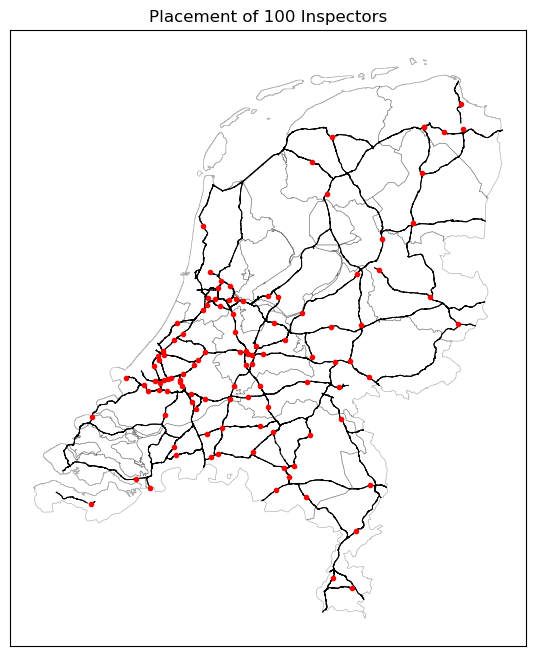

In [14]:
placement_plotter(NWB_Graph, placements)

Qualitatively analyzing this result, the distribution of the 100 inspectors appears to be in line with the expectations derived from our data analysis. Areas with high accident rates, such as Amsterdam, Rotterdam and The Hague, have higher densities, while areas in the northeast with fewer accidents have lower densities.

We can also calculate the average travel time for each number of inspectors using this algorithm. Some slight changes have been made in its sequence of operations to save on code runtime, and this altered version has been placed in its own script ('inspectornr_vs_traveltime.py').

Two types of travel time are calculated. First is what we called the "Node Count Corrected" travel time. Here the travel time to each node is weighed the same and the sum of the travel times is divided by the amount of nodes. The second is the "Probability Corrected" travel time. Here the travel time to a node is multiplied by its "accident proness" probability. As these probabilites sum to 1, we get the travel time in which the travel time to nodes with high risk are values more.

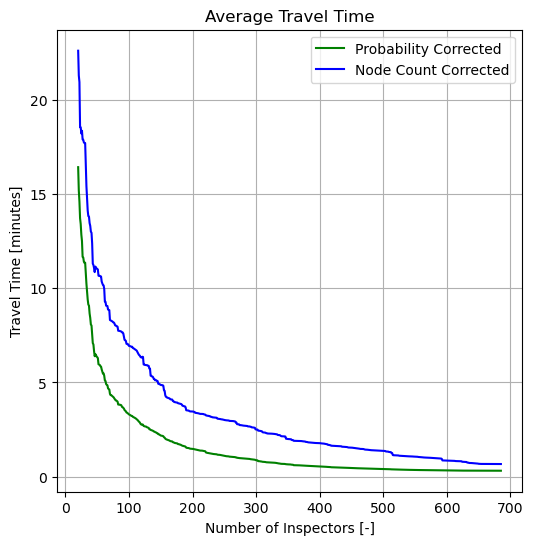

In [17]:
# Runtime of the plot creation can take around 7 minutes
counts, nodal_tts, prob_tts = inspector_nr_vs_travel_time(NWB_Graph, exit_id_count, inspector_speed=100)
travel_time_vs_nr_plotter(counts, nodal_tts, prob_tts)

### 5. Validation ###

#### 5.1 Covering Area

The position of each inspector in the network graph is obtained from the algorithm process. In order to validate the results, we calculate the length that each inspector can reach within 14 minutes as its coverage length. For all inspectors, we obtain the total length of coverage within the road network in 14 minutes, its ratio to the total length of the road network and the redundancy rate. 14 minutes was chosen as this is the average travel time result given by the current model used by Rijkswaterstaat for their placements.

The above indicators are achieved through the following steps:
<ol>
<li>Point coverage calculation: First, the code iteratively checks each inspector point and uses Dijkstra's algorithm to calculate the shortest path starting from this point to all nodes whose distance does not exceed 23,333 meters (100 km/h * 14 minutes in meters). For each edge on the shortest path, the edge information is recorded, including the starting point, the end point, and the geometric information of the edge, and this information is saved in unique_edges and edge_coverage_count. This part of the code is responsible for determining which road edges are within the coverage of each point.</li>
<li>Covered length calculation: Next, the code calculates the total covered length of all different edges, i.e. covered_length. This refers to the total length of all the different road edges covered by the point. The total network length is also calculated, i.e. total_length, which is the total length of all road edges in the entire network.</li>
<li>Coverage ratio calculation: The coverage ratio coverage_ratio is calculated by dividing the coverage length by the total network length.</li>
<li>Redundant length calculation: The code also calculates the redundant length in the coverage, i.e. repeated_length. This means that multiple inspectors may cover the same road edge, and the total length of these road edges is calculated. This value can be used to identify potentially redundant coverage.</li>
<li>Redundancy rate calculation: Finally, the redundancy rate redundancy_rate is calculated by dividing the redundancy length by the coverage length. This ratio represents the proportion of redundancy in coverage to total coverage.</li>


When the coverage ratio is high, it means that the placement of inspectors has successfully covered most of the roads in the network. Relatively speaking, more roads are covered by checkpoints. This usually means that the optimization scheme is doing a good job of covering the roads in the network to better monitor and respond to potential incidents. A high coverage ratio is a positive indicator.

A high redundancy rate usually means that there are multiple points covering similar or identical road segments in the same area. In this case, the system's reliability can be improved. When multiple points cover the same area, the system still has backup options once a certain point is unavailable (for example, multiple accidents occur and the inspector can only handle one of them). But a high redundancy rate may also mean that inspectors are over-allocated to similar or regions, rather than being efficiently allocated to different road segments. This can lead to a waste of resources.

In [18]:
columns = ['inspector_name', 'probability', 'avg_travel_time', 'geometry']
inspector_gdf = gpd.GeoDataFrame(columns=columns)
for inspector_id, inspector_data in placements.items():
    probability, avg_travel_time = inspector_data[0], inspector_data[2]
    geometry = Point(NWB_Graph.nodes[inspector_id]['pos'])
    inspector_gdf.loc[len(inspector_gdf)] = [inspector_id, probability, avg_travel_time, geometry]

In [19]:
# Define the maximum distance
max_distance = (100 / 3.6) * 60 * 14  # 14 minutes at 100 km/h

# Initialize a set to store unique edges that have been covered
unique_edges = set()
edge_coverage_count = defaultdict(int)

for _, inspector in inspector_gdf.iterrows():
    # Calculate the distances of all nodes within the maximum distance for the current inspector
    distances = nx.single_source_dijkstra_path_length(NWB_Graph, inspector['inspector_name'], cutoff=max_distance)
    for node, distance in distances.items():
        # Get all edges connected to the current node from the graph
        for edge in NWB_Graph.edges(node, data=True):
            edge_data = edge[2]
            # Create a unique identifier for the edge using its nodes and geometry
            edge_id = (edge[0], edge[1], edge_data['geom'])  
            unique_edges.add(edge_id)  
            edge_coverage_count[edge_id] += 1  

# Calculate the total length of all covered edges
covered_length = sum(NWB_Graph[edge[0]][edge[1]][0]['geom'].length
                     for edge in unique_edges
                     if NWB_Graph[edge[0]][edge[1]][0]['geom'] is not None)

# Calculate the total length of all edges in the graph
total_length = sum(edge_data['geom'].length
                   for _, _, edge_data in NWB_Graph.edges(data=True)
                   if 'geom' in edge_data and edge_data['geom'] is not None)

# Calculate the coverage ratio as the fraction of the network that has been covered
coverage_ratio = covered_length / total_length

# Calculate the total length that has been covered more than once
repeated_length = sum(
    NWB_Graph[edge[0]][edge[1]][0]['geom'].length
    for edge, count in edge_coverage_count.items()
    if count > 1 and 'geom' in NWB_Graph[edge[0]][edge[1]][0] and NWB_Graph[edge[0]][edge[1]][0]['geom'] is not None
)
# Calculate the redundancy rate as the fraction of the covered network that has been covered more than once
redundancy_rate = repeated_length / covered_length if covered_length > 0 else 0


print(f"Total covered length: {covered_length}")
print(f"Total network length: {total_length}")
print(f"Coverage ratio: {coverage_ratio}")
print(f"Total repeated coverage length: {repeated_length}")
print(f"Redundancy rate: {redundancy_rate}")

Total covered length: 7171309.085845828
Total network length: 7986975.214431146
Coverage ratio: 0.8978754651558772
Total repeated coverage length: 5247778.892805774
Redundancy rate: 0.7317741893406089


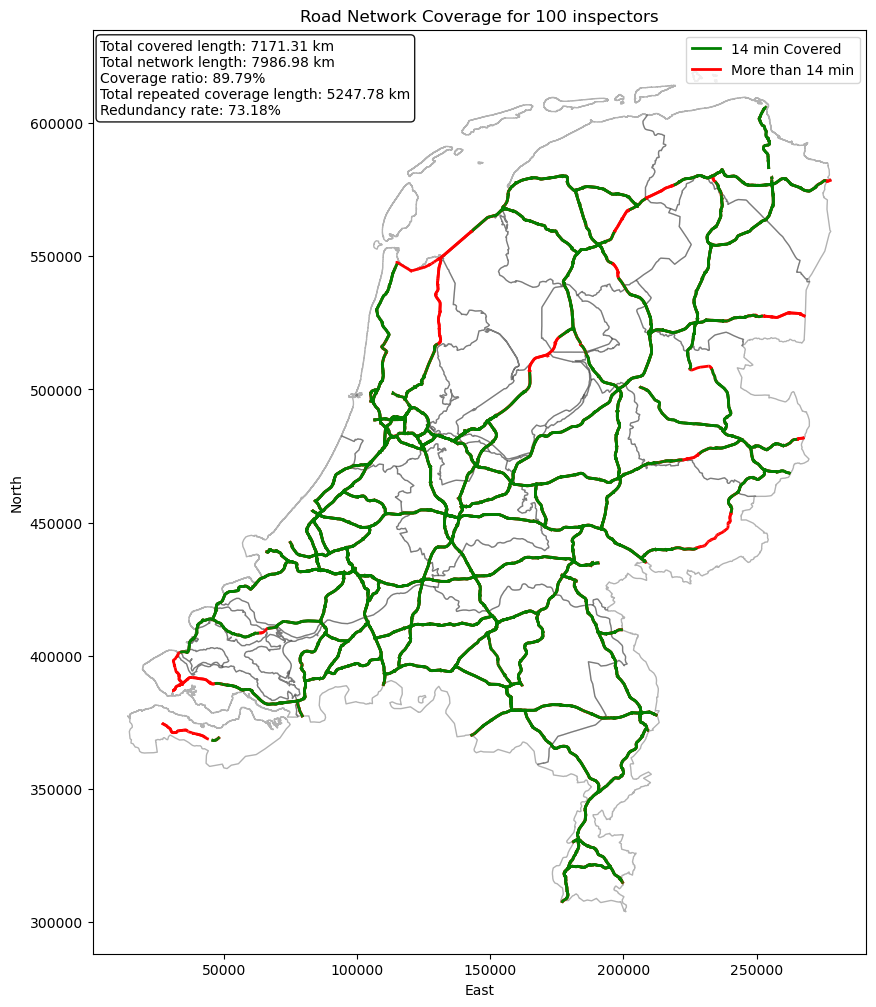

In [24]:
# Create a plot with a specific size to visualize the road network
fig, ax = plt.subplots(figsize=(12, 12))

road_network.plot(ax=ax, color='red', linewidth=2, label='Uncovered')
NL_map.plot(ax = ax, facecolor = "None", alpha = 0.3)

# Retrieve the geometries for covered edges from the NWB_Graph using the unique edges identified earlier
covered_edges_geom = [NWB_Graph[edge[0]][edge[1]][0]['geom'] for edge in unique_edges
                      if 'geom' in NWB_Graph[edge[0]][edge[1]][0] and NWB_Graph[edge[0]][edge[1]][0]['geom'] is not None]
covered_edges_gdf = gpd.GeoDataFrame({'geometry': covered_edges_geom})

covered_edges_gdf.plot(ax=ax, color='green', linewidth=2, label='Covered')

legend_elements = [Line2D([0], [0], color='green', lw=2, label='14 min Covered'),
                   Line2D([0], [0], color='red', lw=2, label='More than 14 min')]
ax.legend(handles=legend_elements, loc='upper right')

ax.set_title('Road Network Coverage for 100 inspectors')
ax.set_xlabel('East')
ax.set_ylabel('North')
ax.text(
    x=0.01,  
    y=0.99,  
    s=f"Total covered length: {covered_length / 1000:.2f} km\n"
      f"Total network length: {total_length / 1000:.2f} km\n"
      f"Coverage ratio: {coverage_ratio:.2%}\n"
      f"Total repeated coverage length: {repeated_length / 1000:.2f} km\n"
      f"Redundancy rate: {redundancy_rate:.2%}",
    transform=ax.transAxes,  
    fontsize=10,
    verticalalignment='top',  
    horizontalalignment='left',  
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.9)  
)

plt.show()

By calculating the coverage area of the allocation results of 100 inspectors, we can clearly see that the highway networks of major cities in the Netherlands have been successfully covered, such as Amsterdam, Rotterdam and The Hague, with only a few in the northeast and southwest. The road section cannot be reached within 14 minutes. The road sections that can be reached by inspectors in 14 minutes account for 89.79% of the total length of the road sections, and all road sections can be reached within 22 minutes. This is a pretty good result and verifies the correctness of the results. The Redundancy rate is as high as 73.18% because a large number of repeated road sections are concentrated in high-accident areas such as big cities. This ensures that when an inspector is not available to handle another incident in this area, nearby inspectors will quickly come to fill the vacancy.

#### 5.2 Average Distance to Incidents

Another indicator is Average Distance to Incidents. An incident set will be selected as the test set, and the nearest distance between each incident in the test set and its nearest inspector will be calculated. Then calculate the average distance of all incidents from the inspector and draw the distribution of distances. (In subsequent calculations, the function will be called directly from validation.py. If you want to read the function code, please open the validation.py file)

Its specific implementation process is as follows:
<ol>
<li>Determination of the nearest point: First, the code traverses each incident point (test_incident_gdf) and calculates the Euclidean distance from the incident point to all inspector points (inspector_gdf). This distance is used to determine the nearest inspector point for each incident point, and the inspector's name (inspector_name) is assigned to the accident point, that is, the "nearest_inspector_name" is determined.</li>

<li>Determination of the nearest edge: Next, the code traverses each accident point, calculates the distance from the incident point to each edge in the network graph, and finds the nearest edge. Then, the two node names of the nearest edges, namely "close_edge_node_1" and "close_edge_node_2", and the distance are recorded.</li>

<li>Shortest path distance calculation: Using the shortest path algorithm (shortest_path_distance function), the code calculates the shortest path distance from the two nodes on the nearest edge to the nearest inspector point, and selects the node with the shorter distance between the two nodes.</li>

<li>Total and average distance calculations: Next, the code calculates the distance from each incident point to the nearest inspector point and uses these distances to calculate the total and average distances. At the same time, the number of unreachable points was recorded.</li>

<li>Distribution plot drawing: Finally, the code draws a histogram of "Travel distance distribution", showing the distance distribution from the incident point to the nearest inspector point. The average distance is also marked in the figure.</li>

If the average distance is shorter, it means the inspector is closer to the incident and can respond faster, which is generally a good indicator. Drawing a distribution map can help visualize distance distribution and aid decision-making.

For the data selection of the test set, we put forward two ideas:
1. Generate a day's incidents and their locations through probabilities based on actual data: the generated incidents have nothing to do with the actual data and are therefore not limited by the actual data. But the data generated may not be realistic because they are based on probabilistic models.
2. Select one day's incidents and their locations from actual data: Selecting one day's incidents from actual data can better simulate the real situation and is more complex and has more diversity, but the actual data set is limited.

##### 5.2.1 Sampled Test Set

Based on all incident data, we first counted the frequency of occurrence on different dates to understand the number of accidents on each date, and used scipy.stats.lognorm.fit and scipy.stats.gamma.fit to estimate the frequency of dates respectively. Combined, the corresponding parameters are obtained. These parameters are used to model random variables. Then sample data was generated, and multiple sample data were randomly extracted from the lognormal distribution and gamma distribution using the fitted parameters. By p
\lotting, comparing the distribution of the actual data (number of accidents) with the distributions fitted by lognormal and gamma, we believe that lognormal is more consistent. Finally, in the generated simulation, a random number of accidents (n_acc) was first extracted from the lognormal distribution, and then a corresponding number of random accident location samples (accident_samples) were extracted using the location probability distribution of the previous KDE estimation results.

Based on the generated test set, we calculate the Average Distance to Incidents and the distance distribution to validate the algorithm results.

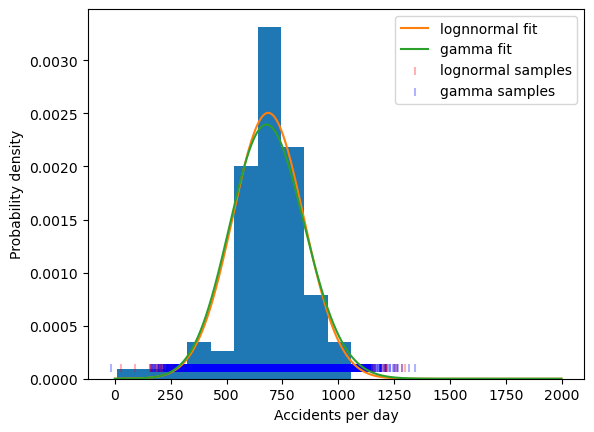

In [20]:
filtered_df = df_incident
# Extract only the date of the strarttime_new column
filtered_df['date'] = df_incident['starttime_new'].dt.date
filtered_df['weekday'] = df_incident['starttime_new'].dt.weekday
weekdays_df = filtered_df[filtered_df['weekday'] < 5]

# Calculate the counts of incidents per date and retrieve the index (dates) and values (counts)
idxs = weekdays_df.value_counts('date').index
vals = weekdays_df.value_counts('date').values

# Fit lognormal distribution and gamma distribution to the observed incident counts
lognorm_params = scipy.stats.lognorm.fit(vals)
gamma_params = scipy.stats.gamma.fit(vals)

# Draw samples from the fitted lognormal distribution and gamma distribution
samp_size = 10000
lognorm_samps = [scipy.stats.lognorm.rvs(*lognorm_params) for _ in range(samp_size)]
gamma_samps = [scipy.stats.gamma.rvs(*gamma_params) for _ in range(samp_size)]

#Visualize the sampling results of the two distributions and compare them with the actual data
plt.hist(vals, density= True)
plt.plot(np.arange(0,2000), scipy.stats.lognorm.pdf(np.arange(0,2000), *lognorm_params), label = 'lognnormal fit')
plt.plot(np.arange(0,2000), scipy.stats.gamma.pdf(np.arange(0,2000), *gamma_params), label = 'gamma fit')
plt.scatter(lognorm_samps, np.zeros_like(lognorm_samps) + 1/10000, marker = '|', c = 'r', alpha = 0.3, label = 'lognormal samples')
plt.scatter(gamma_samps, np.zeros_like(gamma_samps) + 1/10000, marker = '|', c = 'b', alpha = 0.3, label = 'gamma samples')
plt.xlabel('Accidents per day')
plt.ylabel('Probability density')
plt.legend()

From visual results, we judge that the lognormal distribution is more consistent with the number of incidents that occur every day. Therefore, we choose lognormal distribution to randomly generate the number of data in the test set to simulate the number of incidents that occur in a day.

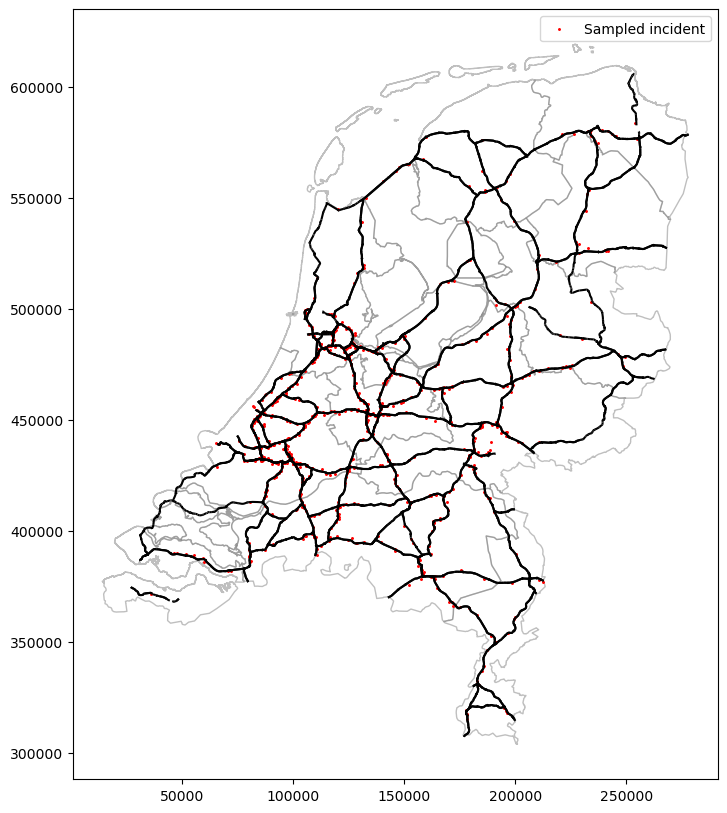

In [23]:
filtered_df["East"], filtered_df["North"] = filtered_df.apply(lambda r: WGS84toDutchRD(r['primaire_locatie_lengtegraad'], r['primaire_locatie_breedtegraad']), 
                                                                                    axis=1, result_type='expand').T.values
bandwidth = 0.01
accident_coords = filtered_df[['East', 'North']].values.T
# kde estimate
gkde = gaussian_kde(accident_coords, bw_method=bandwidth)
gkde.resample(1)

# Sample number of accidents from lognormal distribution
np.random.seed(42)
n_acc = np.round(scipy.stats.lognorm.rvs(*lognorm_params),0).astype(int)
# Sample locations of the accidents from the KDE
accident_samples = gkde.resample(size=n_acc)
accident_samples[0].shape

# Get the coordinate pair from the KDE location
accident_locs = [(accident_samples[0][i], accident_samples[1][i]) for i in range(n_acc)]

#Visualize the sampling results
fig, ax = plt.subplots(figsize=(10,10))
road_network.plot(ax = ax, color = 'black')
NL_map.plot(ax = ax, facecolor = 'none', edgecolor = 'grey', alpha = 0.5)
plt.scatter(accident_samples[0], accident_samples[1], c = 'r', marker = '.', s = 5, label = 'Sampled incident')
plt.legend()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13220\3304810001.py:2: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  samples_gdf['geometry'] = gpd.points_from_xy(accident_samples[0], accident_samples[1])


c:\Users\Usuario\anaconda3\envs\geospatial\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


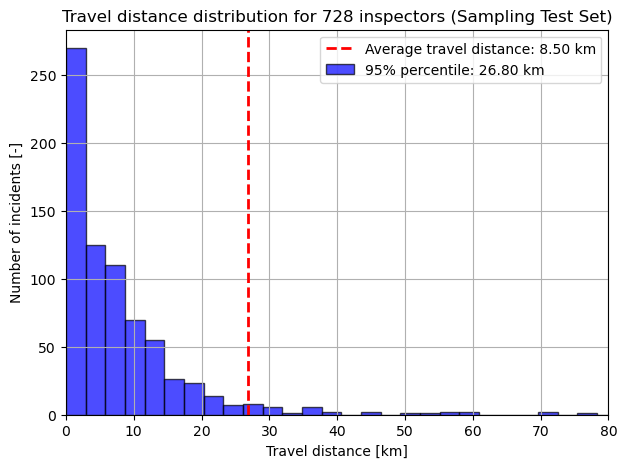

In [25]:
samples_gdf = gpd.GeoDataFrame()
samples_gdf['geometry'] = gpd.points_from_xy(accident_samples[0], accident_samples[1])

samples_gdf = validation.find_nearest_inspector(samples_gdf, inspector_gdf)
samples_gdf = validation.find_closest_edge(samples_gdf, NWB_Graph)
samples_gdf, samples_total_distance, samples_average_distance = validation.calculate_total_distance(NWB_Graph, samples_gdf)
filtered_samples = samples_gdf[np.isfinite(samples_gdf['Travel distance'])]
filtered_samples['Travel distance (KM)'] = filtered_samples['Travel distance']/1000

#Calculate 95% percentile
percentile_95 = np.percentile(filtered_samples['Travel distance (KM)'], 95)

plt.figure(figsize=(7, 5))
plt.hist(filtered_samples['Travel distance (KM)'], bins=50, density=False, color='blue', edgecolor='black', alpha=0.7)
# location of 95% percentile
plt.axvline(percentile_95, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Travel distance [km]')
plt.ylabel('Number of incidents [-]')
plt.legend([f'Average travel distance: {samples_average_distance/1000:.2f} km',
            f'95% percentile: {percentile_95:.2f} km'])  
plt.title(f"Travel distance distribution for {len(filtered_samples)-10} inspectors (Sampling Test Set)")
plt.xlim(0, 80)
plt.grid(True)
plt.show()

The validation results through the generated test set show that the average distance between each incident and the nearest inspector is 8.50 kilometers. If the inspector's speed is 100 kilometers per hour, it only takes 5.1 minutes on average. And 95% of the incidents are less than 27 km from the nearest inspector and can be reached within 16.2 minutes. And many incidents are even less than 2 kilometers away from the inspectors.

##### 5.2.2 Real Test Set

We randomly selected the accident on 1-10-2019 as the test set, with a total of 1021 pieces of data.

In [50]:
test_incident_gdf = validation.filter_accidents_in_time_range(df_incident, '2019-10-1', '2019-10-2')
test_incident_gdf = validation.find_nearest_inspector(test_incident_gdf, inspector_gdf)
test_incident_gdf = validation.find_closest_edge(test_incident_gdf, NWB_Graph)
test_incident_gdf_distance, test_total_distance, test_average_distance = validation.calculate_total_distance(NWB_Graph, test_incident_gdf)

d:\anaconda\envs\geospatial\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


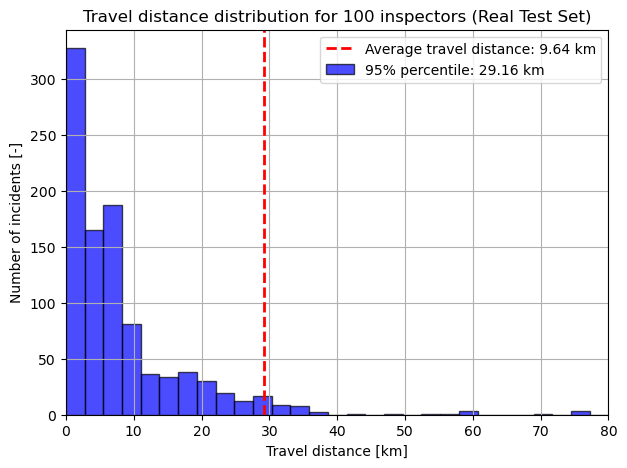

In [72]:
filtered_incidents = test_incident_gdf[np.isfinite(test_incident_gdf['Travel distance'])]
filtered_incidents['Travel distance (KM)'] = filtered_incidents['Travel distance']/1000

percentile_95 = np.percentile(filtered_incidents['Travel distance (KM)'], 95)

plt.figure(figsize=(7, 5))
plt.hist(filtered_incidents['Travel distance (KM)'], bins=50, density=False, color='blue', edgecolor='black', alpha=0.7)
plt.axvline(percentile_95, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Travel distance [km]')
plt.ylabel('Number of incidents [-]')
plt.legend([f'Average travel distance: {test_average_distance/1000:.2f} km',
            f'95% percentile: {percentile_95:.2f} km'])  
plt.title(f"Travel distance distribution for {len(placements)-10} inspectors (Real Test Set)")
plt.xlim(0, 80)
plt.grid(True)
plt.show()

The validation results through the real test set show that the average distance between each incident and the nearest inspector is 9.64 kilometers. If the inspector's speed is 100 kilometers per hour, it only takes 5.78 minutes on average. And 95% of the incidents are less than 29.16km from the nearest inspector and can be reached within 17.5 minutes. And many incidents are even less than 2 kilometers away from the inspector.

Although different data are used as test sets, the results of the two are very similar, which means that the position of our optimized inspectors can quickly reach the location of the incident, and only a few accidents take more than 20 minutes. These results show that our deployment results are suitable and can meet the vast majority of situations and needs.

### 6. Conclusions ###

The following are the conclusions of the project, according to the research objective and questions posed:

<ul>
    <li>Throughout this document, an algorithm for placing inspectors in the Dutch Motorway Network was devised, implemented, and tested, as intended when setting the main objective of the assignment. As explained in previous chapters, the optimal location depends on the desired number of inspectors to place, and as such there exists a trade-off between this value, the response time and network coverage. Our algorithm correctly identifies the areas in which an accident is more likely to occur and assigns inspectors accordingly.<br><br></li>
    <li>For reaching the research objective, the algorithm takes as starting point the incident dataset provided by Rijkswaterstaat, and the Rijkswegen road network Shapefile. In consequence, the results provided are representative of the temporal and geographic context in which information was gathered. Even though validation and simulation procedures were implemented to assess the placement strength, it is important to use different datasets to increase the representativeness of the results.<br><br></li>
    <li>When analysing the spatial distribution of incidents in the Netherlands, 8 cluster zones could be identified; among them, the Randstad area (Amsterdam – The Hague – Rotterdam) contains the vast majority of incident points followed by the Eindhoven metropolitan region, and the northeast and southwest regions contained the fewest points. Now, when it comes to the temporal distribution of incidents, it is important to highlight that accidents and vehicle obstructions were more frequent in the evening peak and in the morning peak, while general obstructions tend to happen in the afternoon before the evening peak; on the other hand, Thursdays and Fridays  were the days when more incidents occurred, while Wednesdays had the lowest accident count; finally, November was the month with the lowest incident count, but when it comes to accidents only, August had the lowest count.<br><br></li>
    <li>Two main statistical analyses were conducted to determine the probability of an accident happening at a certain location. In the first place, a lognormal distribution was fit to the daily accident count to determine the probability that a certain accident number occurs in a single day. Then, and a nonparametric distribution was fit to the accidents location using Kernel Density Estimation (KDE), so that the accident probability of a network segment could be calculated, and ultimately samples of accidents locations in a typical day could be drawn.<br><br></li>
    <li>The way the algorithm works, inspector placement is conditioned by the spatial incident density and the desired number of inspectors. However, the spatial incident density function can be calculated for the dataset as a whole or for a specific subset, meaning that the user can filter the dataset according to specific criteria and get an inspector placement accordingly. The inspector response time can be broken down into the time it takes between an incident happens and it is reported, the time it takes to determine which inspector should attend the incident, and the travel time of that inspector to the incident; the scope of this project only concerns the latter calculation.<br><br></li>
    <li>Inspector travel time to the incident is calculated by determining the shortest path between their location and the incident’s location using Dijkstra's algorithm. For this it is assumed that a inspectors can circulate at a speed of 100 km/h without any limitations regarding traffic flow or lack of emergency lanes.<br><br></li>
    <li>A script to calculate and plot the relationship between the number of inspectors and average travel time to incidents was generated. From the results it was evident that it is not possible to minimize both variables, as a trade-off exists between them. Therefore, the optimal number of inspectors would depend on other decision criteria, such as economic or supply chain constraints, quantitative aspects or other key performance indicators that are not addressed at the moment. However, it is important to note that the algorithm devised has enough flexibility to incorporate these elements.</li>
</ul>